In [1]:
import numpy as np
import cupy as cp
import poppy
from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

import misc_funs as misc

from scoobpsf import scoobm2
reload(scoobm2)

poppy_log.disabled = True

pupil_diam = 6.8*u.mm
wavelength_c = 632.8e-9*u.m

# vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, rotation=20)
# lyot_stop = poppy.CircularAperture(name='Lyot Stop', radius=3.8*u.mm/2, gray_pixel=False)

Could not import scoobpy.
scoobpy not installed: testbed interface unavailable.


In [2]:
reload(scoobm2)
model = scoobm2.SCOOBM()

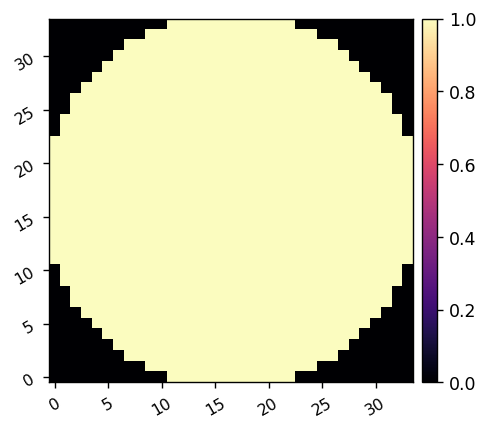

In [3]:
misc.imshow1(model.dm_mask)

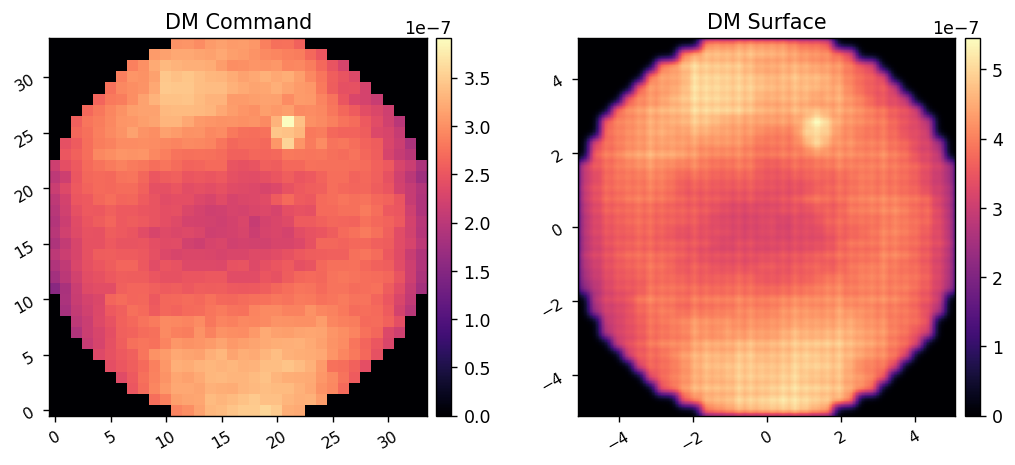

In [4]:
dm_flat = fits.getdata(scoobm2.module_path/'scoob_dm_flat.fits')
model.set_dm(dm_flat)
model.show_dm()

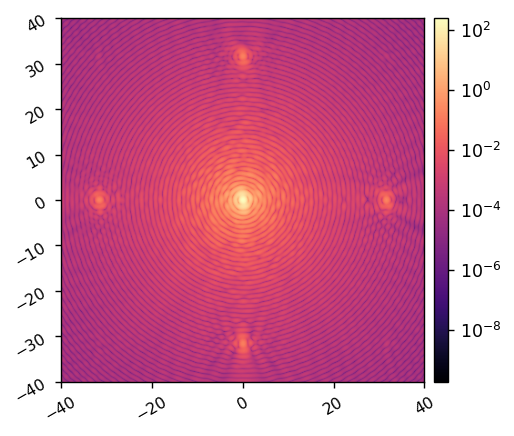

In [5]:
# model.use_opds = True
model.norm='none'
im = model.snap()

misc.imshow1(im, lognorm=True, pxscl=model.psf_pixelscale_lamD)